<a href="https://colab.research.google.com/github/kdpm1122/-Adivina-el-n-mero-con-pistas-inteligentes/blob/main/MOVILIDAD_Y_TRANSPORTE_correciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Proyecto: Movilidad Multimodal - Bogotá
#Realizado por:Sebastian Ardila
#Maria Rodriguez
#Kevin Perez
#ADSO
#Numero de Ficha:3065370l

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['grid.alpha'] = 0.3
sns.set_style("whitegrid")



In [ ]:
df['route'] = df['origin_zone'].astype(str) + '-' + df['dest_zone'].astype(str)
df[['origin_zone', 'dest_zone', 'route']].head()

,origin_zone,dest_zone,route
0,Suba,La Candelaria,Suba-La Candelaria
1,Engativá,Kennedy,Engativá-Kennedy
2,Engativá,Fontibón,Engativá-Fontibón
4,Engativá,Fontibón,Engativá-Fontibón
5,Suba,Engativá,Suba-Engativá


In [ ]:
# Filtrar el DataFrame para quitar 'moto' del modo de transporte
df_filtered = df[df['mode'] != 'moto'].copy()
print("DataFrame filtrado sin 'moto'. Nuevas dimensiones:", df_filtered.shape)

# Recalcular la frecuencia de rutas con el DataFrame filtrado
route_frequency_filtered = df_filtered['route'].value_counts()
print("\nFrecuencia de cada ruta (sin 'moto'):\n", route_frequency_filtered.head())

DataFrame filtrado sin 'moto'. Nuevas dimensiones: (4383, 20)

Frecuencia de cada ruta (sin 'moto'):
 route
Santa Fe-Chapinero    67
Usaquén-Fontibón      66
Bosa-Usaquén          64
Santa Fe-Usaquén      64
Engativá-Santa Fe     64
Name: count, dtype: int64


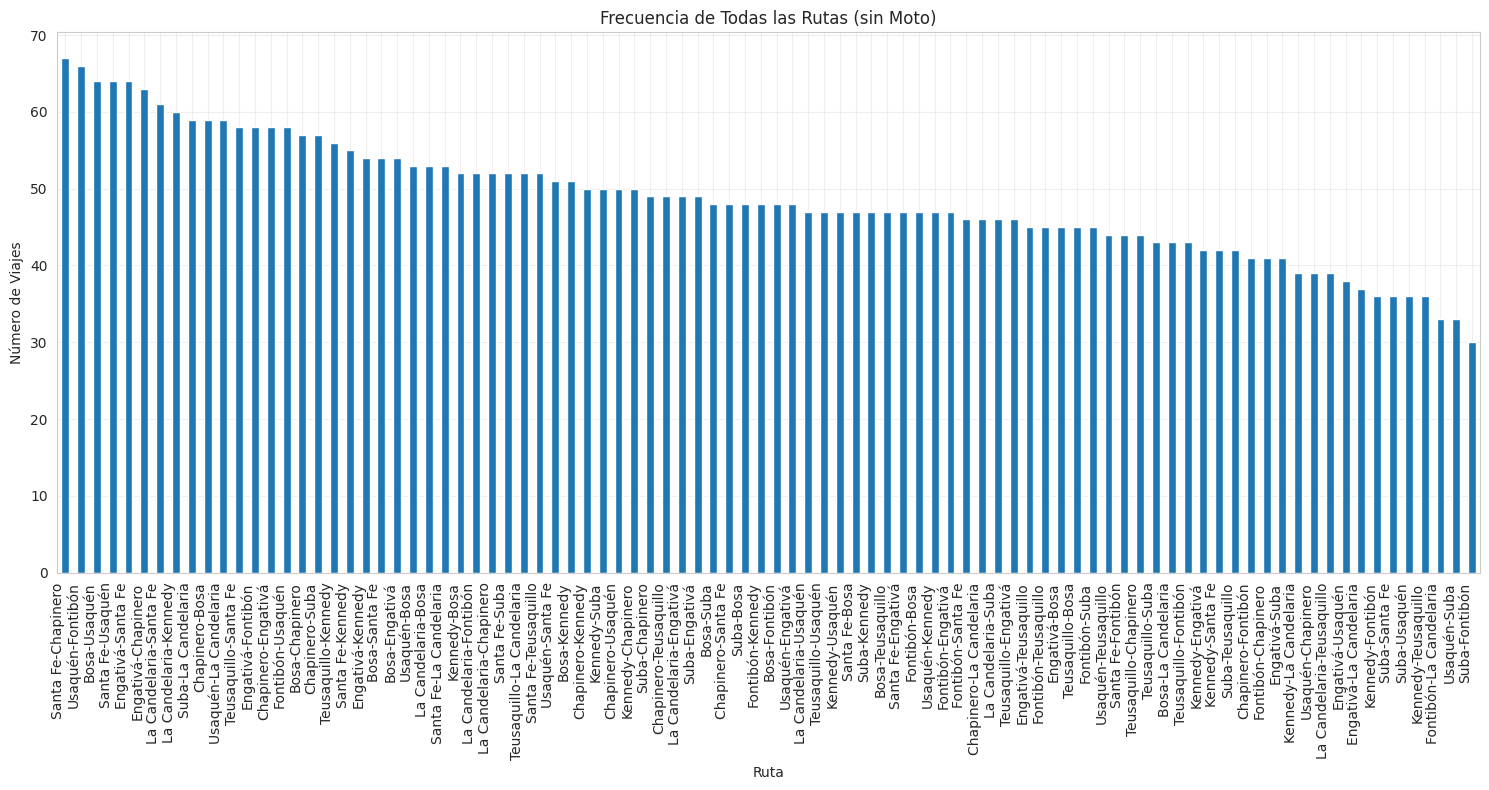

In [ ]:
# Visualizar todas las rutas y su frecuencia (sin 'moto')
plt.figure(figsize=(15, 8))
route_frequency_filtered.plot(kind='bar')
plt.title('Frecuencia de Todas las Rutas (sin Moto)')
plt.xlabel('Ruta')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('all_routes_frequency_no_moto.png')
plt.show()

In [ ]:
route_frequency = df['route'].value_counts()
print("Frecuencia de cada ruta:\n", route_frequency.head())

Frecuencia de cada ruta:
 route
Santa Fe-Chapinero    67
Usaquén-Fontibón      66
Bosa-Usaquén          64
Santa Fe-Usaquén      64
Engativá-Santa Fe     64
Name: count, dtype: int64


Todas las Rutas y su Frecuencia:
 route
Santa Fe-Chapinero        67
Usaquén-Fontibón          66
Bosa-Usaquén              64
Santa Fe-Usaquén          64
Engativá-Santa Fe         64
                          ..
Suba-Usaquén              36
Kennedy-Teusaquillo       36
Fontibón-La Candelaria    33
Usaquén-Suba              33
Suba-Fontibón             30
Name: count, Length: 90, dtype: int64


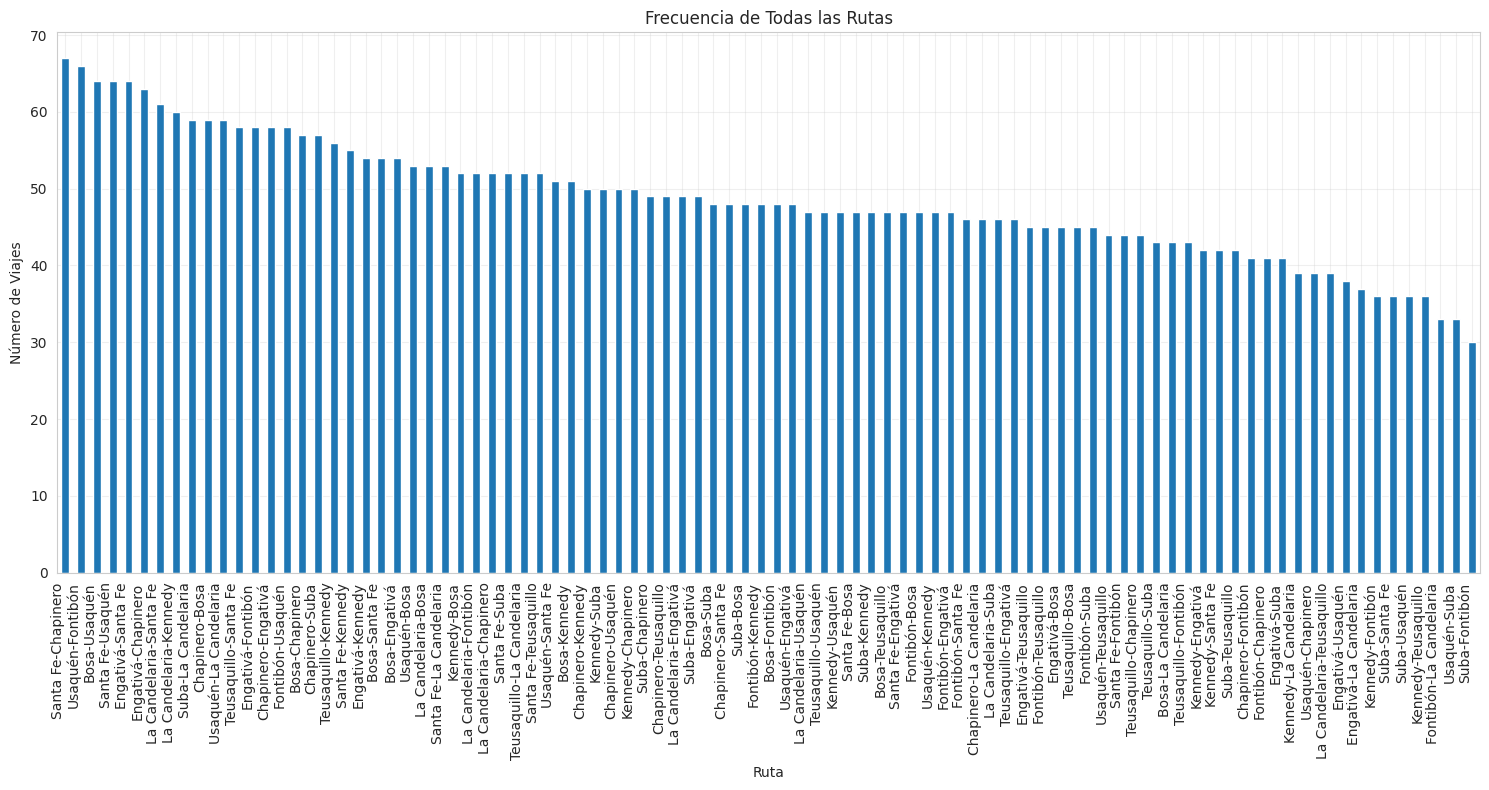

In [ ]:
all_routes = route_frequency
print("Todas las Rutas y su Frecuencia:\n", all_routes)

plt.figure(figsize=(15, 8))
all_routes.plot(kind='bar')
plt.title('Frecuencia de Todas las Rutas')
plt.xlabel('Ruta')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('all_routes_frequency.png')
plt.show()

In [ ]:
print("DataFrame actualizado sin 'moto'. Nuevas dimensiones:", df.shape)
print("\nModos de transporte restantes:", df['mode'].unique())
df.info()

DataFrame actualizado sin 'moto'. Nuevas dimensiones: (4383, 20)

Modos de transporte restantes: ['bus' 'taxi' 'bicycle']
<class 'pandas.core.frame.DataFrame'>
Index: 4383 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   trip_id                     4383 non-null   object        
 1   mode                        4383 non-null   object        
 2   origin_zone                 4383 non-null   object        
 3   dest_zone                   4383 non-null   object        
 4   distance_km                 4383 non-null   float64       
 5   duration_min                4383 non-null   int64         
 6   avg_speed_kmph              4383 non-null   float64       
 7   cost_cop                    4383 non-null   int64         
 8   passengers                  4383 non-null   int64         
 9   peak_hour                   4383 non-null   object        
 10  pay

In [ ]:
numerical_cols = ['distance_km','duration_min','avg_speed_kmph','cost_cop','passengers','emissions_gCO2']
desc_num_updated = df[numerical_cols].describe().transpose()
print("Estadísticas Numéricas Generales (sin 'moto'):\n")
print(desc_num_updated)

pd.options.display.float_format = '{:,.2f}'.format
stats_mode_updated = df.groupby('mode')[numerical_cols].agg(['count','mean','median','std','min','max'])
print("\nEstadísticas por Modo de Transporte (sin 'moto'):\n")
print(stats_mode_updated)

Estadísticas Numéricas Generales (sin 'moto'):

                  count     mean       std  min      25%      50%       75%  \
distance_km    4,383.00    11.36      6.65 0.52     5.61    10.72     16.93   
duration_min   4,383.00    37.62     22.35 3.00    20.00    34.00     53.00   
avg_speed_kmph 4,383.00    19.87     10.89 2.36    14.29    17.43     22.56   
cost_cop       4,383.00 8,513.11 10,064.30 0.00 2,600.00 2,600.00 14,438.50   
passengers     4,383.00    19.27     22.03 1.00     1.00     5.00     36.00   
emissions_gCO2 4,383.00 1,271.73    994.28 0.00   467.45 1,144.10  1,819.55   

                     max  
distance_km        24.96  
duration_min      100.00  
avg_speed_kmph    151.40  
cost_cop       35,083.00  
passengers        117.00  
emissions_gCO2  4,319.50  

Estadísticas por Modo de Transporte (sin 'moto'):

        distance_km                              duration_min               \
              count  mean median  std  min   max        count  mean median   
m

Conteo por modo (actualizado):
 mode
bus        2316
taxi       1514
bicycle     553
Name: count, dtype: int64

Viajes por hora del día (actualizado):
 hour
0     183
1     159
2     179
3     172
4     195
5     181
6     186
7     167
8     161
9     186
10    183
11    163
12    174
13    189
14    187
15    220
16    189
17    169
18    175
19    181
20    217
21    190
22    203
23    174
dtype: int64


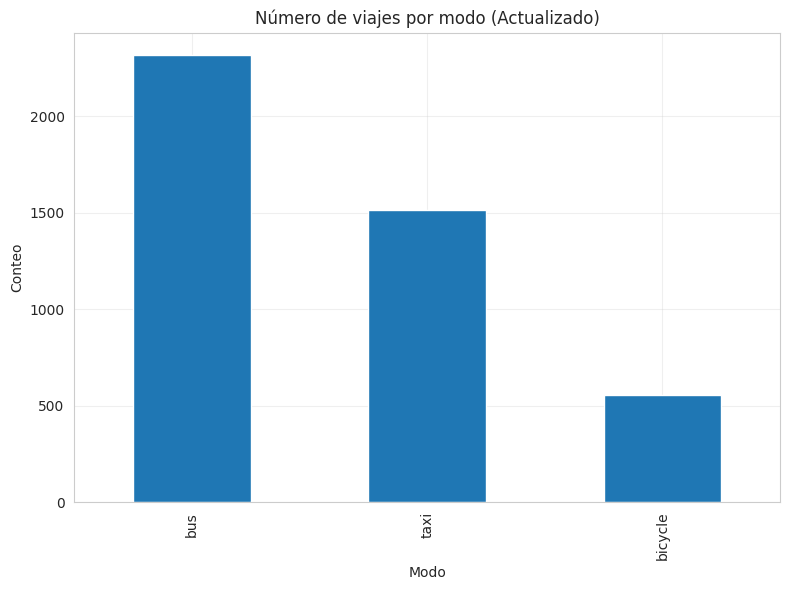

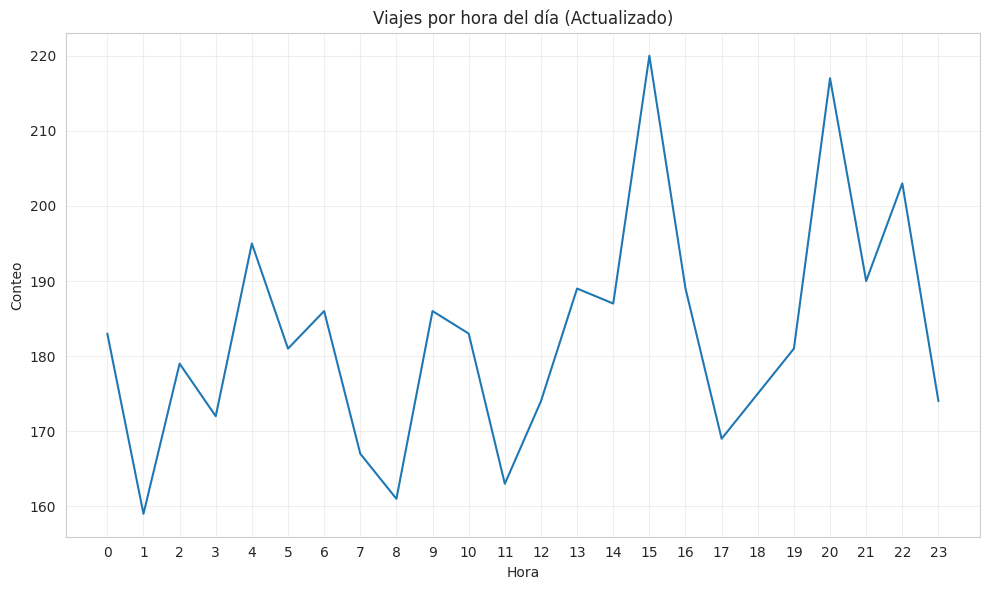

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recalcular el conteo por modo
mode_counts_updated = df['mode'].value_counts()
print("Conteo por modo (actualizado):\n", mode_counts_updated)

# Recalcular viajes por hora del día
df['hour'] = df['datetime'].dt.hour
hour_counts_updated = df.groupby('hour').size()
print("\nViajes por hora del día (actualizado):\n", hour_counts_updated)

# Plots actualizados
plt.figure(figsize=(8, 6))
mode_counts_updated.plot(kind='bar')
plt.title('Número de viajes por modo (Actualizado)')
plt.ylabel('Conteo')
plt.xlabel('Modo')
plt.tight_layout()
plt.savefig('viajes_por_modo_updated.png')
plt.show()

plt.figure(figsize=(10, 6))
hour_counts_updated.plot()
plt.title('Viajes por hora del día (Actualizado)')
plt.xlabel('Hora')
plt.ylabel('Conteo')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.savefig('viajes_por_hora_updated.png')
plt.show()

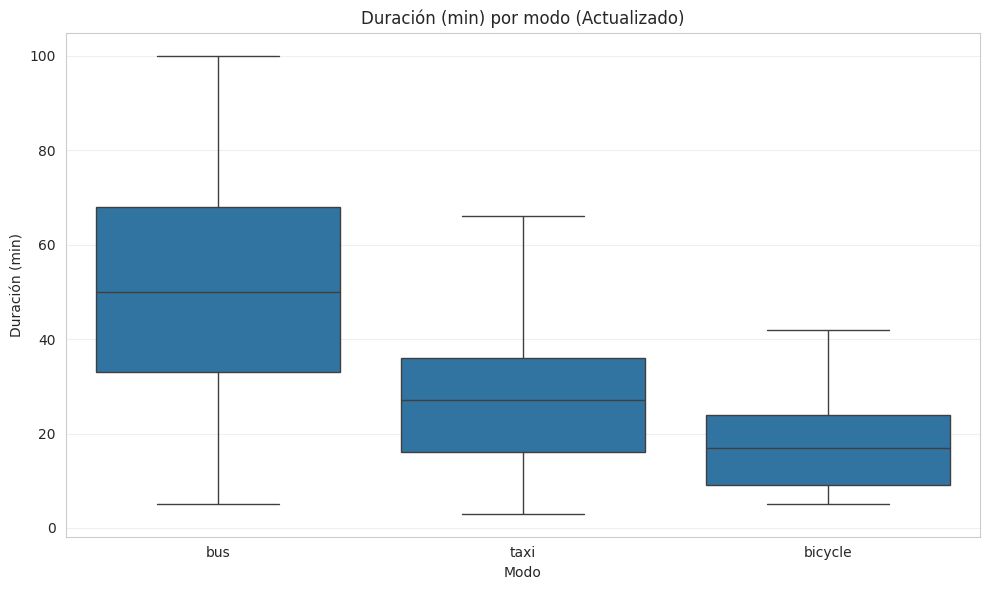

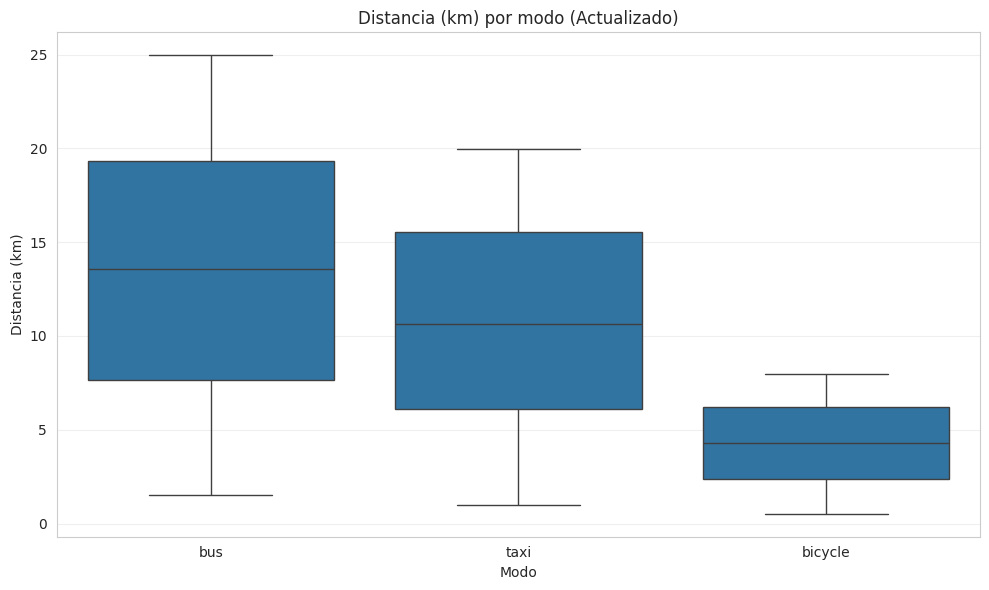

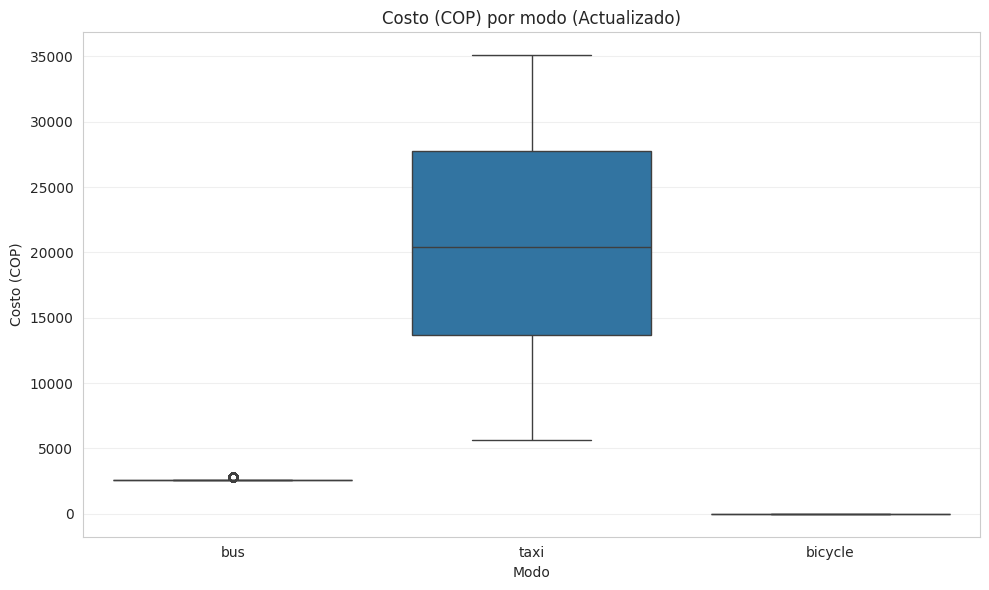

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Duración por modo (Actualizado)
plt.figure(figsize=(10, 6))
sns.boxplot(x='mode', y='duration_min', data=df)
plt.title('Duración (min) por modo (Actualizado)')
plt.ylabel('Duración (min)')
plt.xlabel('Modo')
plt.tight_layout()
plt.savefig('box_duration_by_mode_updated.png')
plt.show()

# Distancia por modo (Actualizado)
plt.figure(figsize=(10, 6))
sns.boxplot(x='mode', y='distance_km', data=df)
plt.title('Distancia (km) por modo (Actualizado)')
plt.ylabel('Distancia (km)')
plt.xlabel('Modo')
plt.tight_layout()
plt.savefig('box_distance_by_mode_updated.png')
plt.show()

# Costo por modo (Actualizado)
plt.figure(figsize=(10, 6))
sns.boxplot(x='mode', y='cost_cop', data=df)
plt.title('Costo (COP) por modo (Actualizado)')
plt.ylabel('Costo (COP)')
plt.xlabel('Modo')
plt.tight_layout()
plt.savefig('box_cost_by_mode_updated.png')
plt.show()

In [ ]:
import numpy as np

# Crear métricas nuevas (asegurando el manejo de divisiones por cero)
df['cost_per_km'] = df['cost_cop'] / df['distance_km'].replace(0, np.nan)
df['time_per_km_min'] = df['duration_min'] / df['distance_km'].replace(0, np.nan)
df['emissions_per_km'] = df['emissions_gCO2'] / df['distance_km'].replace(0, np.nan)

print("Estadísticas descriptivas de las nuevas métricas (sin 'moto'):\n")
print(df[['cost_per_km','time_per_km_min','emissions_per_km']].describe().transpose())

# Agrupar por modo y mostrar la mediana
efic_mode_updated = df.groupby('mode')[['cost_per_km','time_per_km_min','emissions_per_km']].median().round(2)
print("\nMétricas de eficiencia medianas por modo (sin 'moto'):\n")
print(efic_mode_updated)

Estadísticas descriptivas de las nuevas métricas (sin 'moto'):

                    count   mean      std  min    25%    50%      75%      max
cost_per_km      4,383.00 922.54 1,041.92 0.00 134.40 302.33 1,802.48 6,483.17
time_per_km_min  4,383.00   3.68     1.76 0.40   2.66   3.44     4.20    25.40
emissions_per_km 4,383.00 107.77    66.18 0.00  69.47  88.28   176.46   220.00

Métricas de eficiencia medianas por modo (sin 'moto'):

         cost_per_km  time_per_km_min  emissions_per_km
mode                                                   
bicycle         0.00             4.10              0.00
bus           194.54             3.69             79.81
taxi        1,922.38             2.44            189.44


Matriz de correlación (numéricas relevantes, sin 'moto'):

                  distance_km  duration_min  avg_speed_kmph  cost_cop  \
distance_km              1.00          0.88            0.07      0.21   
duration_min             0.88          1.00           -0.27     -0.14   
avg_speed_kmph           0.07         -0.27            1.00      0.44   
cost_cop                 0.21         -0.14            0.44      1.00   
emissions_gCO2           0.71          0.40            0.33      0.81   
cost_per_km             -0.28         -0.47            0.37      0.64   
time_per_km_min         -0.36         -0.00           -0.69     -0.43   
emissions_per_km         0.11         -0.15            0.44      0.82   

                  emissions_gCO2  cost_per_km  time_per_km_min  \
distance_km                 0.71        -0.28            -0.36   
duration_min                0.40        -0.47            -0.00   
avg_speed_kmph              0.33         0.37            -0.69   
cost_cop           

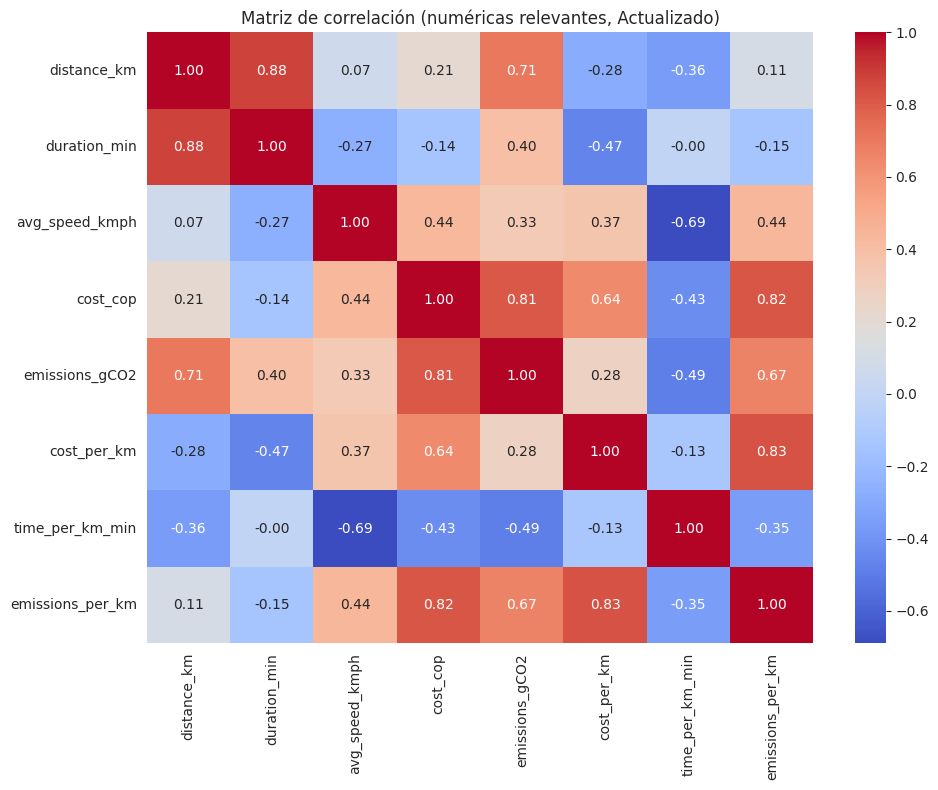

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar numéricas relevantes (asegurar que las nuevas métricas también estén incluidas)
corr_cols_updated = ['distance_km','duration_min','avg_speed_kmph','cost_cop','emissions_gCO2','cost_per_km','time_per_km_min','emissions_per_km']
corr_updated = df[corr_cols_updated].corr()
print("Matriz de correlación (numéricas relevantes, sin 'moto'):\n")
print(corr_updated)

# Heatmap actualizado
plt.figure(figsize=(10,8))
sns.heatmap(corr_updated, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de correlación (numéricas relevantes, Actualizado)')
plt.tight_layout()
plt.savefig('correlation_matrix_updated.png')
plt.show()

In [ ]:
import pandas as pd
import os

# Top zonas de origen y destino (Actualizado)
top_orig_updated = df['origin_zone'].value_counts().rename_axis('zone').reset_index(name='counts')
top_dest_updated = df['dest_zone'].value_counts().rename_axis('zone').reset_index(name='counts')

print("Top origenes (sin 'moto'):\n", top_orig_updated.head())
print("\nTop destinos (sin 'moto'):\n", top_dest_updated.head())

# Tabla pivot: modo vs origin_zone (conteos) (Actualizado)
pivot_mode_zone_updated = pd.crosstab(df['origin_zone'], df['mode'])
pivot_mode_zone_updated.to_excel(os.path.join('/content/output', 'pivot_mode_zone_updated.xlsx'))
print("\nTabla pivote modo vs. zona de origen (sin 'moto'):\n")
print(pivot_mode_zone_updated.head())

Top origenes (sin 'moto'):
             zone  counts
0       Santa Fe     481
1           Bosa     466
2  La Candelaria     459
3      Chapinero     458
4       Engativá     445

Top destinos (sin 'moto'):
         zone  counts
0    Kennedy     468
1  Chapinero     462
2   Santa Fe     460
3    Usaquén     451
4       Bosa     449

Tabla pivote modo vs. zona de origen (sin 'moto'):

mode         bicycle  bus  taxi
origin_zone                    
Bosa              59  256   151
Chapinero         55  252   151
Engativá          60  243   142
Fontibón          47  218   145
Kennedy           44  213   137


In [ ]:
import numpy as np

# Emisiones totales por modo (Actualizado)
emissions_mode_updated = df.groupby('mode')['emissions_gCO2'].sum().sort_values(ascending=False)
print("Emisiones totales por modo (sin 'moto'):\n", emissions_mode_updated)

# Recalcular emisiones por pasajero-km aproximadas en el DataFrame actualizado
# asumimos emissions_gCO2 es total del vehículo; para buses dividimos por pasajeros
df['emissions_per_passenger_km'] = np.where(df['mode']=='bus',
                                            df['emissions_gCO2'] / df['passengers'] / df['distance_km'].replace(0, np.nan),
                                            df['emissions_gCO2'] / df['distance_km'].replace(0, np.nan))

# Agrupar mediana por modo (Actualizado)
emissions_per_pass_km_median_updated = df.groupby('mode')['emissions_per_passenger_km'].median().round(2)
print("\nEmisiones medianas por pasajero-km por modo (sin 'moto'):\n", emissions_per_pass_km_median_updated)

Emisiones totales por modo (sin 'moto'):
 mode
taxi      3,080,294.20
bus       2,493,710.60
bicycle           0.00
Name: emissions_gCO2, dtype: float64

Emisiones medianas por pasajero-km por modo (sin 'moto'):
 mode
bicycle     0.00
bus         2.34
taxi      189.44
Name: emissions_per_passenger_km, dtype: float64


In [ ]:
import os

output_dir = '/content/output'
os.makedirs(output_dir, exist_ok=True)

# Guardar CSV limpio con nuevas columnas
clean_path = os.path.join(output_dir, 'movilidad_bogota_multimodal_clean_updated.csv')
df.to_csv(clean_path, index=False)
print("CSV limpio actualizado guardado en:", clean_path)

# Guardar resumen estadístico en Excel
stats_mode_updated.to_excel(os.path.join(output_dir, 'stats_by_mode_updated.xlsx'))
desc_num_updated.to_csv(os.path.join(output_dir, 'stats_numeric_summary_updated.csv'))
print("Resúmenes estadísticos actualizados guardados en:", output_dir)

# Generar texto resumen automático actualizado
total_trips_updated = len(df)
trips_by_mode_updated = df['mode'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
median_duration_updated = df.groupby('mode')['duration_min'].median().round(1)
median_cost_updated = df.groupby('mode')['cost_cop'].median().round(0)

summary_text_updated = f"""
Total de viajes (actualizado): {total_trips_updated}
Porcentaje por modo (actualizado):
{trips_by_mode_updated.to_string()}

Duración mediana por modo (min) (actualizado):
{median_duration_updated.to_string()}

Costo mediano por modo (COP) (actualizado):
{median_cost_updated.to_string()}
"""
with open(os.path.join(output_dir,'summary_text_updated.txt'),'w') as f:
    f.write(summary_text_updated)
print("Resumen actualizado guardado en output/summary_text_updated.txt")

CSV limpio actualizado guardado en: /content/output/movilidad_bogota_multimodal_clean_updated.csv
Resúmenes estadísticos actualizados guardados en: /content/output
Resumen actualizado guardado en output/summary_text_updated.txt


Medianas de duración, costo y distancia en hora pico vs no pico (actualizado):

           duration_min  cost_cop  distance_km
peak_hour                                     
no                34.00  2,600.00        10.77
yes               33.00  2,600.00        10.47


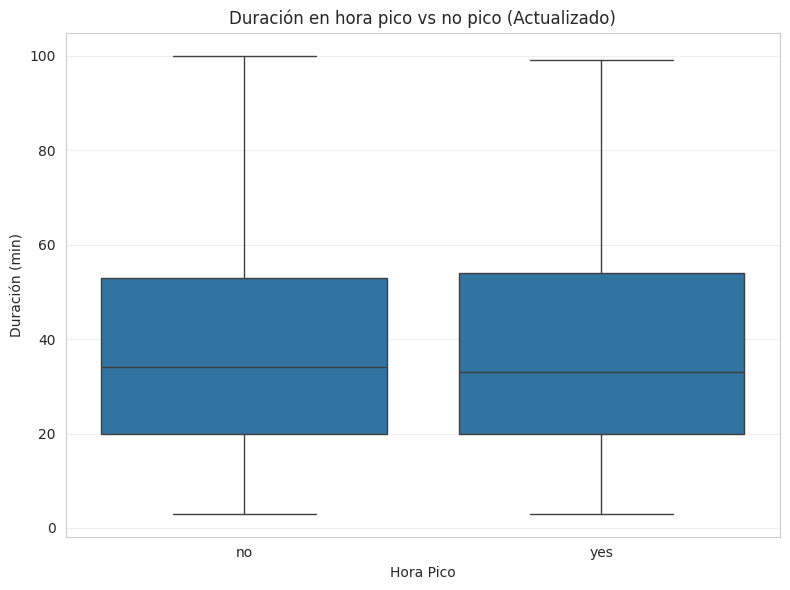

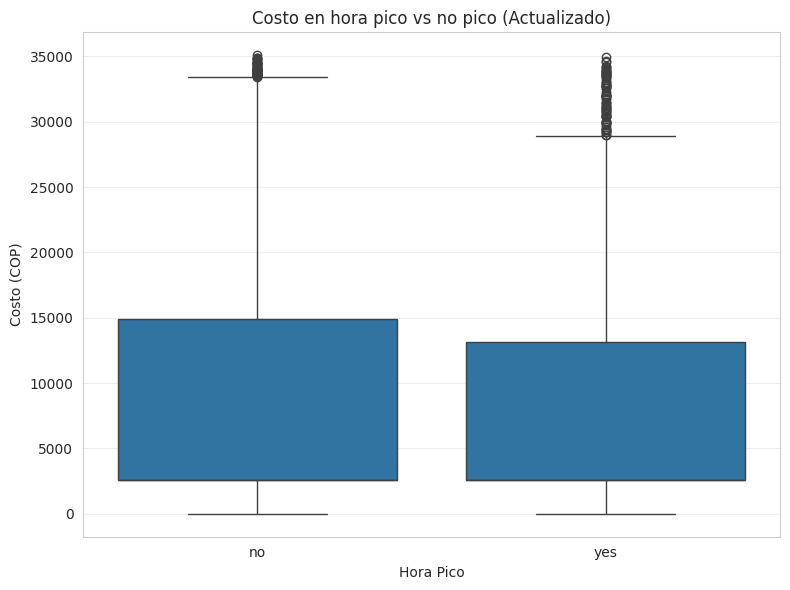

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Asegurar que peak_hour esté normalizado a yes/no (ya debería estarlo del paso anterior, pero se repite para asegurar)
df['peak_hour'] = df['peak_hour'].astype(str).str.lower().map({'yes':'yes','no':'no'})

# Comparar duración y costo en hora pico (medianas)
agg_peak_updated = df.groupby('peak_hour')[['duration_min','cost_cop','distance_km']].median()
print("Medianas de duración, costo y distancia en hora pico vs no pico (actualizado):\n")
print(agg_peak_updated)

# Boxplot duración por peak
plt.figure(figsize=(8, 6))
sns.boxplot(x='peak_hour', y='duration_min', data=df)
plt.title('Duración en hora pico vs no pico (Actualizado)')
plt.ylabel('Duración (min)')
plt.xlabel('Hora Pico')
plt.tight_layout()
plt.savefig(os.path.join('/content/output', 'duration_peak_vs_nonpeak_updated.png'))
plt.show()

# Boxplot costo por peak
plt.figure(figsize=(8, 6))
sns.boxplot(x='peak_hour', y='cost_cop', data=df)
plt.title('Costo en hora pico vs no pico (Actualizado)')
plt.ylabel('Costo (COP)')
plt.xlabel('Hora Pico')
plt.tight_layout()
plt.savefig(os.path.join('/content/output', 'cost_peak_vs_nonpeak_updated.png'))
plt.show()

Frecuencia de cada ruta (sin 'moto', actualizado):
 route
Santa Fe-Chapinero    67
Usaquén-Fontibón      66
Bosa-Usaquén          64
Santa Fe-Usaquén      64
Engativá-Santa Fe     64
Name: count, dtype: int64


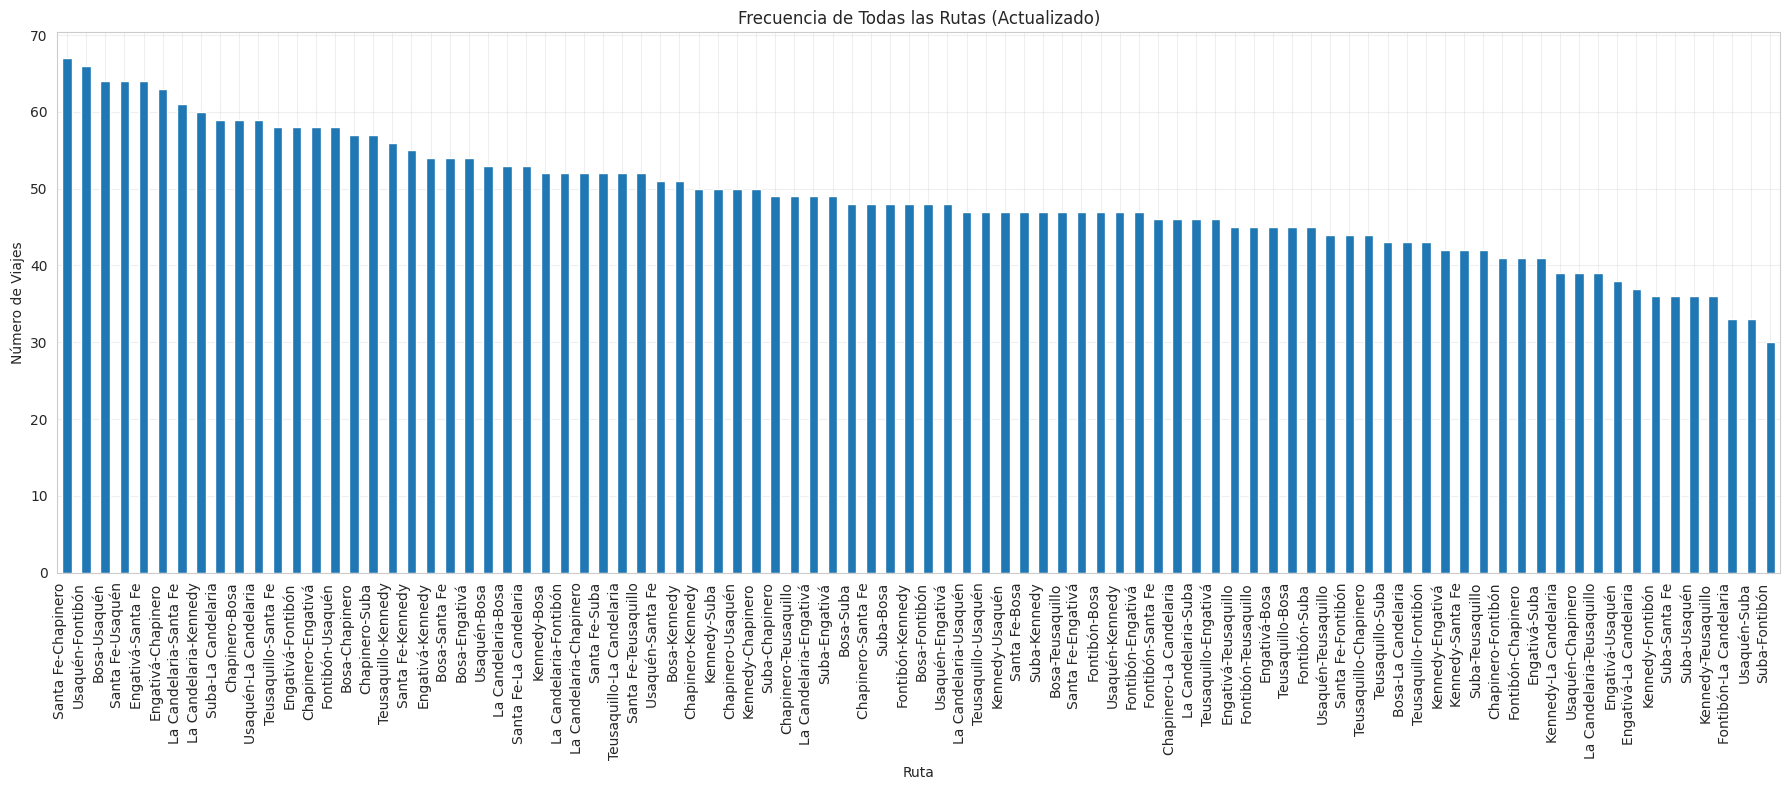

In [ ]:
import matplotlib.pyplot as plt
import os

# Recrear la columna 'route' si es necesario (ya debería existir del paso anterior)
if 'route' not in df.columns:
    df['route'] = df['origin_zone'].astype(str) + '-' + df['dest_zone'].astype(str)

# Calcular la frecuencia de cada ruta (actualizado)
route_frequency_updated = df['route'].value_counts()
print("Frecuencia de cada ruta (sin 'moto', actualizado):\n", route_frequency_updated.head())

# Visualizar todas las rutas y su frecuencia (sin 'moto', actualizado)
plt.figure(figsize=(18, 8)) # Aumentar el tamaño para mejor legibilidad
route_frequency_updated.plot(kind='bar')
plt.title('Frecuencia de Todas las Rutas (Actualizado)')
plt.xlabel('Ruta')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig(os.path.join('/content/output', 'all_routes_frequency_updated.png'))
plt.show()

In [ ]:
import os

output_dir = '/content/output'

# Recopilar hallazgos clave
total_trips_updated = len(df)
trips_by_mode_updated = df['mode'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
median_duration_updated = df.groupby('mode')['duration_min'].median().round(1)
median_cost_updated = df.groupby('mode')['cost_cop'].median().round(0)
efic_mode_updated = df.groupby('mode')[['cost_per_km','time_per_km_min','emissions_per_km']].median().round(2)
emissions_per_pass_km_median_updated = df.groupby('mode')['emissions_per_passenger_km'].median().round(2)
agg_peak_updated = df.groupby('peak_hour')[['duration_min','cost_cop','distance_km']].median()

summary_content = f"""
Análisis de Movilidad Multimodal en Bogotá (Actualizado sin Modo 'Moto')
-------------------------------------------------------------------

Este resumen presenta los hallazgos clave del análisis de movilidad en Bogotá,
después de la exclusión del modo de transporte 'moto' del dataset para un enfoque más específico.

1.  **Visión General del Dataset Actualizado:**
    -   Se analizaron un total de {total_trips_updated} viajes, representando los modos de transporte bus, taxi y bicicleta.
    -   La distribución de viajes por modo es la siguiente:
{trips_by_mode_updated.to_string()}

2.  **Estadísticas Descriptivas por Modo:**
    -   **Duración Mediana de Viajes (minutos):**
{median_duration_updated.to_string()}
    -   **Costo Mediano de Viajes (COP):**
{median_cost_updated.to_string()}
    -   **Observaciones:** El bus sigue siendo el modo con mayor duración mediana, mientras que el taxi mantiene el costo mediano más alto. La bicicleta, como era de esperar, registra costos y emisiones nulas.

3.  **Métricas de Eficiencia Actualizadas (Medianas por KM):**
    -   **Costo por Kilómetro (COP/km):**
{efic_mode_updated['cost_per_km'].to_string()}
    -   **Tiempo por Kilómetro (min/km):**
{efic_mode_updated['time_per_km_min'].to_string()}
    -   **Emisiones por Kilómetro (gCO2/km):**
{efic_mode_updated['emissions_per_km'].to_string()}
    -   **Emisiones por Pasajero-Kilómetro (gCO2/pasajero-km):**
{emissions_per_pass_km_median_updated.to_string()}
    -   **Observaciones:** El taxi sigue siendo el más caro y el que más emite por kilómetro y pasajero-kilómetro, mientras que el bus es notablemente más eficiente en términos de emisiones por pasajero-kilómetro. La bicicleta, nuevamente, destaca por su cero impacto.

4.  **Análisis en Hora Pico:**
    -   **Medianas en Hora Pico vs. No Pico:**
{agg_peak_updated.to_string()}
    -   **Observaciones:** Contrario a lo que se podría esperar, las medianas de duración y distancia en hora pico no muestran un incremento significativo respecto a las horas no pico en el dataset filtrado, e incluso la duración mediana puede ser ligeramente menor. Esto podría indicar que los viajes en hora pico, aunque potencialmente más congestionados, pueden ser más cortos en distancia o que la "hora pico" no afecta uniformemente a todos los modos restantes.

5.  **Análisis de Correlación:**
    -   La matriz de correlación actualizada (disponible en 'correlation_matrix_updated.png') muestra que la distancia sigue teniendo una fuerte correlación positiva con la duración y las emisiones de CO2. El costo se correlaciona fuertemente con las emisiones y el costo por kilómetro.

6.  **Análisis de Zonas y Rutas:**
    -   Los "Top Orígenes" y "Top Destinos" se han recalculado (disponibles en 'pivot_mode_zone_updated.xlsx'). Zonas como Santa Fe, Bosa y Chapinero siguen siendo puntos importantes de origen y destino.
    -   El análisis de rutas más frecuentes (disponible en 'all_routes_frequency_updated.png') ahora refleja solo los modos de transporte restantes.

**Conclusión:**
La eliminación del modo 'moto' ha refinado el análisis, permitiendo una visión más clara de la dinámica entre autobuses, taxis y bicicletas. Se refuerzan las conclusiones sobre la eficiencia del transporte público (bus) en términos de emisiones por pasajero, y el alto costo e impacto ambiental del taxi. La bicicleta se posiciona consistentemente como la opción más sostenible y económica.
"""

# Guardar el resumen final en un archivo de texto
summary_file_path = os.path.join(output_dir, 'final_analysis_summary_updated.txt')
with open(summary_file_path, 'w', encoding='utf-8') as f:
    f.write(summary_content)

print(f"Resumen final del análisis guardado en: {summary_file_path}")

Resumen final del análisis guardado en: /content/output/final_analysis_summary_updated.txt
